In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from ipywidgets import interact, FloatSlider

In [2]:
#simulating via euler's method
def simulateBatch(CA0, k, tEnd, dt):
    t = 0
    CA = CA0
    
    times = [t]
    CAs = [CA]

    while t < tEnd:
        t += dt
        #euler's method
        dCA_dt = -k * CA
        CA = CA + dCA_dt * dt

        times.append(t)
        CAs.append(CA)
    
    return times, CAs

In [3]:
#using first order kinetics formula: [A]t = [A]0e^-kt
def IRL(CA0, k, tEnd, dt):
    t = 0
    CA = CA0

    times = [t]
    CAs = [CA]

    while t < tEnd:
        t += dt
        #[A]t = [A]0e^-kt
        CA = CA0 * (math.e) ** (-k * t)

        CAs.append(CA)
        times.append(t)

    return times, CAs

In [4]:
t, CA_sim = simulateBatch(50, 0.5, 1, 0.2)
print(t, CA_sim)

[0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0] [50, 45.0, 40.5, 36.45, 32.805, 29.5245]


In [6]:
t, CA_exact = IRL(50, 0.5, 1, 0.2)
print(t, CA_exact)

[0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0] [50, 45.241870901797974, 40.936537653899094, 37.040911034085894, 33.51600230178197, 30.326532985631673]


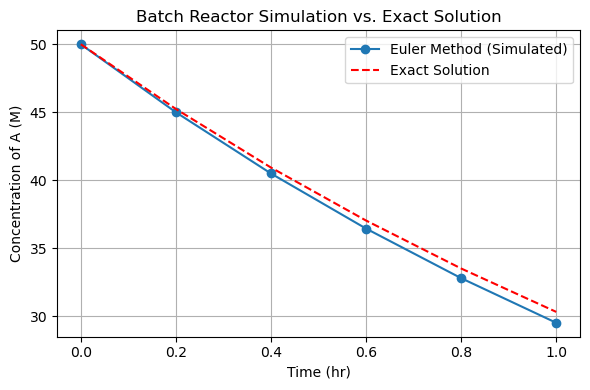

In [6]:
# Plotting
plt.figure(figsize=(6, 4))  # Set size of the plot
plt.plot(t, CA_sim, 'o-', label='Euler Method (Simulated)')
plt.plot(t, CA_exact, 'r--', label='Exact Solution')

# Labels and title
plt.xlabel('Time (hr)')
plt.ylabel('Concentration of A (M)')
plt.title('Batch Reactor Simulation vs. Exact Solution')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [7]:
def productConcentration(p_rRatio, CA0, k, tEnd, dt):

    reactorTs, reactorCAs = simulateBatch(CA0, k, tEnd, dt)

    times = reactorTs
    CAs = []

    for reactorCA in reactorCAs:
        CAs.append(p_rRatio * (CA0 - reactorCA))
    
    return times, CAs

In [10]:
t, reactantC = simulateBatch(50, 0.5, 1, 0.2)
t, productC = productConcentration(1, 50, 0.5, 1, 0.2)

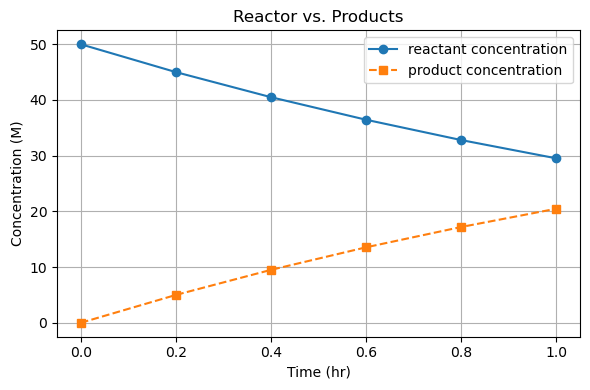

In [11]:
# Plotting
plt.figure(figsize=(6, 4))  # Set size of the plot
plt.plot(t, reactantC, 'o-', label='reactant concentration')
plt.plot(t, productC, 's--', label='product concentration')

# Labels and title
plt.xlabel('Time (hr)')
plt.ylabel('Concentration (M)')
plt.title('Reactor vs. Products')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()